# Libraries to Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Traffic Signals

![title](korean_traffic_light.png)

![title](smart_traffic_light.png)

- Indication: Illumination of one or more signal colors (green, yellow,red) 
- Cycle: One complete sequence (green->yellow->red)
- Cycle Length: C, time to complete one cycle
- Green time: G, time with green indication
- Yellow time: Y, time with yellow indication
- Red time: R, time with red indication
- All-red time aka Clearance Interval: Time when all directional approaches have red indication

**Loss Time $$t_L = t_{cl} + t_{sl}$$**

**$t_{sl}$ : Startup lost time. Time between when light turns green and then when vehicles start moving**

**$t_{cl}$ : Clearance lost time. Lost time at the end of cycle including the ALL-RED time!**

### Signal Capacity
$$c = s \frac{g}{C}$$ 

- g: Effective Green Time
- r: Effective Red Time
- Signal Capacity c: Maximum hourly volume that can pass through intersection
- Staturation Flow s

$$ s= \frac{3600}{h}$$

- If h is the saturation headway measured in seconds per vehicle, we would use the formula above

# Traffic Signal Example

Louis, the RSO President of ITE@UIUC has decided to go to Sidney Lu Mechanical Engineering Building and measure the northbound and southbound traffic. Louis has determined that the arrival rate is 1800 vehicles per hour and the discharge rate is 3600 vehicles per hour. He has assigned his friends in ITE@UIUC to do the following analysis:

If the effective red time is 50 seconds, what is the minimum effective time g such that there will not be queues carried over to the next signal cycle?

In [2]:
#We need to first convert 1800 vehicles per hour and 3600 vehicles per hour.
#They need to have the time measurement in seconds 

def converter(rate):
    answer = rate/3600
    return answer

In [3]:
arrival = converter(1800)
departure = converter(3600)
print('Arrival Rate:',arrival,'veh/sec')
print('Departure Rate:',departure,'veh/sec')

Arrival Rate: 0.5 veh/sec
Departure Rate: 1.0 veh/sec


In [4]:
#Departure won't happen until 50 seconds later
#we know that A(t) = 0.5t
#we know that D(t) = t
#but we are not done yet. Arrival will accumulate but departure won't for 50 seconds
#What do we do?
#A(t) = 0.5t <- this remains
#D(t) = (t-50) we are going to shift D(t) 50 seconds to the right let's see the data plot!

In [5]:
effective_red_time = 50 #effective red time is 50 seconds

In [6]:
from sympy import *
t = symbols('t')
eq1 = arrival*t
eq2 = departure*(t-effective_red_time)

In [7]:
eq1 #arrival rate

0.5*t

In [8]:
eq2 #departure rate

1.0*t - 50.0

**Now what is the minimum effective green time?
First we need to solve where the two lines intersect**

**Let's set up the equation!**
$$ A(t) = D(t) \\ $$
$$ 0.5t = 1.0t - 50 \\ $$
$$ 0.5t = 50 \\  $$
$$ t = 100$$

In [9]:
answer = solve(eq1-eq2,t)
dis = int(answer[0])
print('Queue dissipates at', dis,'seconds.')

ttotal = int(answer[0])
min_eff_green = int(ttotal-effective_red_time)
print('Minimum Effective Green Time is',min_eff_green,'seconds.')

Queue dissipates at 100 seconds.
Minimum Effective Green Time is 50 seconds.


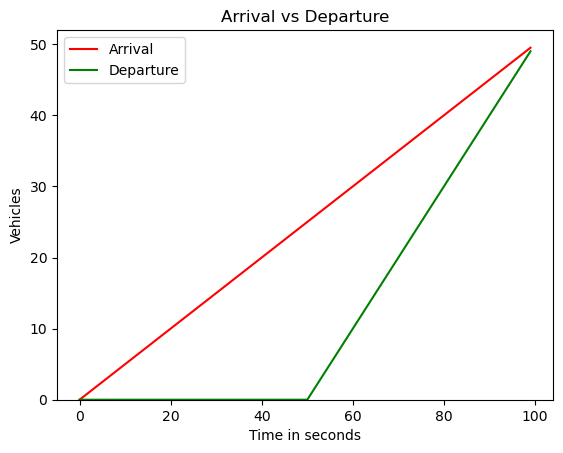

In [10]:
times = [t for t in range(0,dis)]
a = [arrival*time for time in times]
d_stop = [0 for i in range(min_eff_green)]
d = [departure*(time)-min_eff_green for time in range(min_eff_green,dis)]
dd = d_stop + d
plt.title('Arrival vs Departure')
plt.xlabel('Time in seconds')
plt.ylabel('Vehicles')
plt.plot(times,a,label='Arrival',color='red')
plt.plot(times,dd,label='Departure',color='green')
plt.gca().set_ylim(bottom=0)
plt.legend()

**Total Delay?**

We need to just simply find the area under the curve

In [11]:
from sklearn.metrics import auc

In [12]:
arrival_area = auc(times,a)
arrival_area

2450.25

In [13]:
depart_area = auc(times,dd)
depart_area

1200.5

In [14]:
delay = np.ceil(arrival_area-depart_area)
print('Total Delay is',delay,'seconds')

Total Delay is 1250.0 seconds


## Traffic Control Devices

$$ y = t + \frac{v}{2a \pm 64.4G} \\ $$
$$ r = \frac{W+l}{v} $$

- t = driver reaction time (sec) (assume 1 sec for y calc)
- V = design speed (mph)
- W = width of the intersection (fps)
- l = length of the vehicle (ft) (assume 20ft for y calc)
- y = length of the yellow interval to the nearest 0.1 sec (sec)
- r = length of the red clearance interval to the nearest 0.1 sec (sec) 

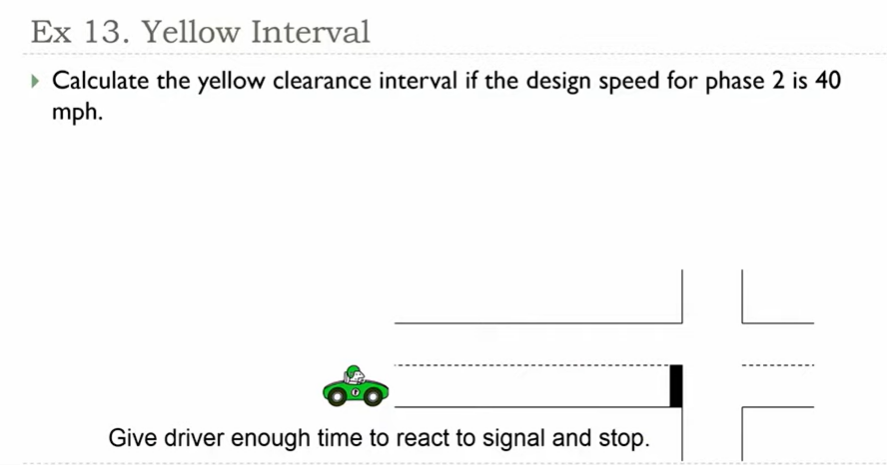

In [15]:
# Solution
v = 40 # Design speed mph 
a = 11.2 # ft/sec^2 
G = 0 # Grade is not given
t = 1 # sec 
num = v 
den = 2*a-64.4*G
y = t+(num/den) 
y = round(y,2)
print(f'Yellow clearance time: {y} seconds')

Yellow clearance time: 2.79 seconds


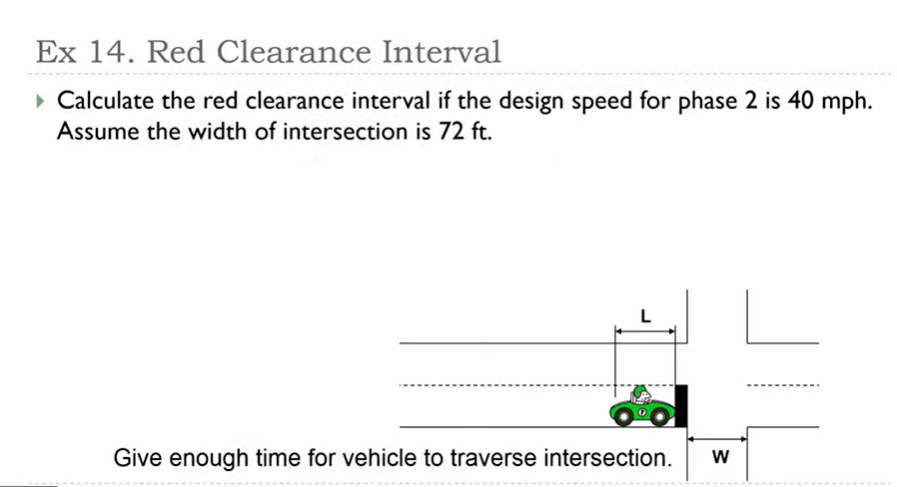

In [16]:
# Solution
v = 40 # Design speed mph 
W = 72 # ft width of the intersection 
l = 20 # ft length of the car 
r = (W+l)/(1.47*v)
r = round(r,2)
print(f'Red clearance time: {r} seconds')

Red clearance time: 1.56 seconds
